In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Energy_consumption_dataset.csv')
df.head(5)

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [5]:
df.describe()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.588687,6.888306,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,6.000000,11.000000,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,9.000000,18.000000,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

,0
Month,0
Hour,0
DayOfWeek,0
Holiday,0
Temperature,0
Humidity,0
SquareFootage,0
Occupancy,0
HVACUsage,0
LightingUsage,0


/tmp/ipython-input-676164289.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y= 'EnergyConsumption', data = monthly_average_consumption, palette='viridis')


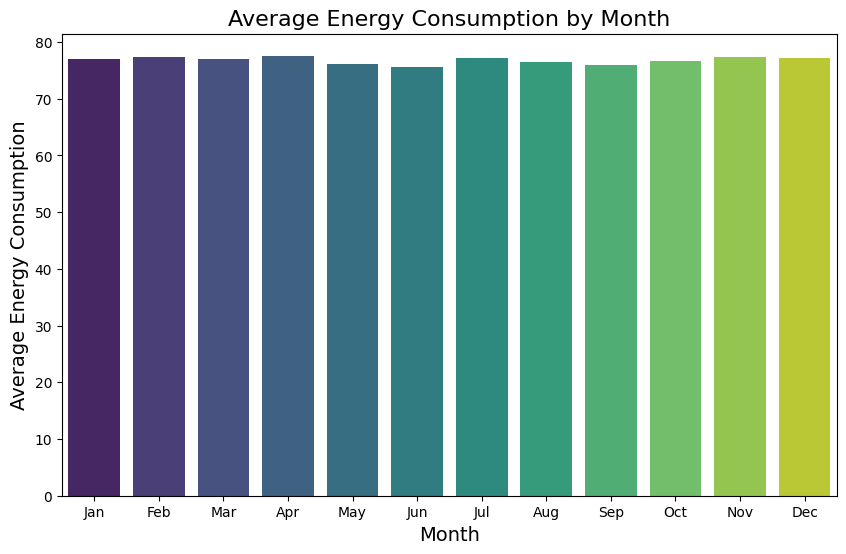

In [8]:
monthly_average_consumption = df.groupby('Month')['EnergyConsumption'].mean().reset_index()
# bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y= 'EnergyConsumption', data = monthly_average_consumption, palette='viridis')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


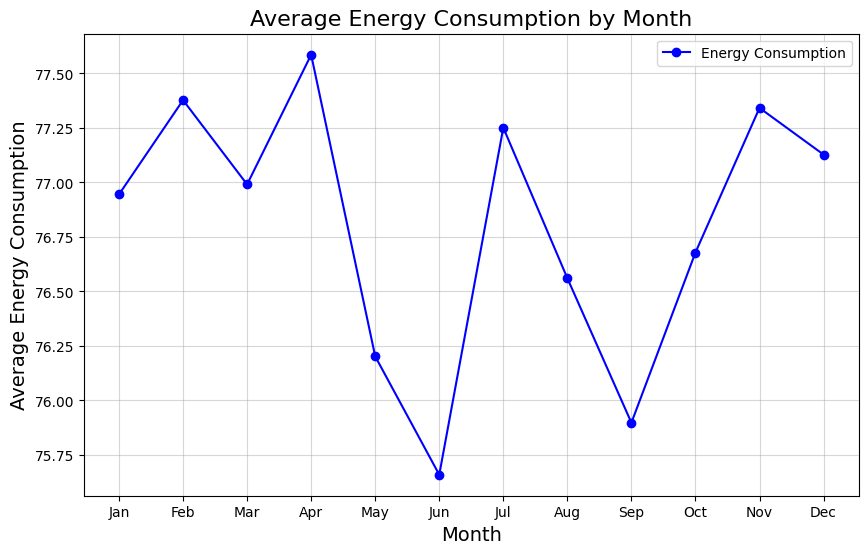

In [9]:
monthly_avg_consumption = df.groupby('Month')['EnergyConsumption'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_consumption['Month'],
         monthly_avg_consumption['EnergyConsumption'],
         marker='o', color='b', label='Energy Consumption')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [10]:
def get_season(month):
    if month in [3, 4, 5]:  # Summer: Mar, Apr, May
        return 'Summer'
    elif month in [6, 7, 8]:  # Monsoon: Jun, Jul, Aug
        return 'Monsoon'
    elif month in [9, 10, 11]:  # Autumn: Sep, Oct, Nov
        return 'Autumn'
    else:  # Winter: Dec, Jan, Feb
        return 'Winter'
df['Season'] = df['Month'].apply(get_season)
df = df.drop('Month', axis=1)
columns = ['Season'] + [col for col in df.columns if col != 'Season']
df = df[columns]

In [11]:
df.head()

,Season,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,Winter,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,Winter,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,Winter,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,Winter,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,Winter,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [12]:
df['Season'].unique()

array(['Winter', 'Summer', 'Monsoon', 'Autumn'], dtype=object)

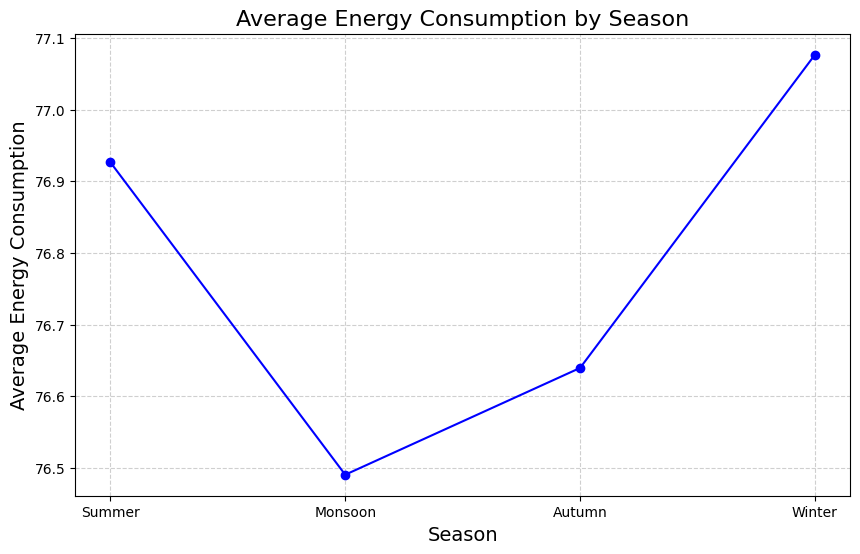

In [13]:
season_avg_consumption = df.groupby('Season')['EnergyConsumption'].mean().reset_index()

# Define the order of seasons
season_order = ['Summer', 'Monsoon', 'Autumn', 'Winter']
season_avg_consumption['Season'] = pd.Categorical(season_avg_consumption['Season'], categories=season_order, ordered=True)
season_avg_consumption = season_avg_consumption.sort_values('Season')

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(season_avg_consumption['Season'], season_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='b')
plt.title('Average Energy Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

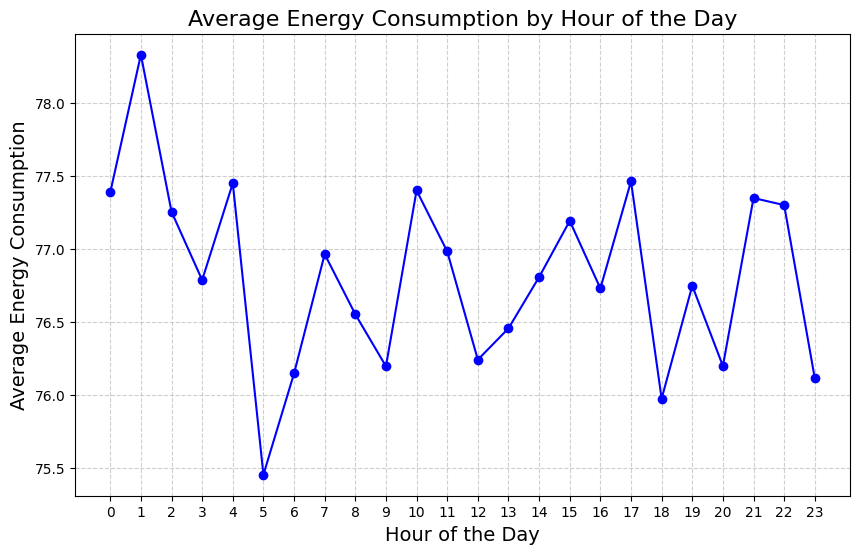

In [14]:
hour_avg_consumption = df.groupby('Hour')['EnergyConsumption'].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(hour_avg_consumption['Hour'], hour_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='b')
plt.title('Average Energy Consumption by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(range(0, 24))  # Hour range from 0 to 23
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

In [15]:
def get_time_of_day(hour):
    if 4 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)
df = df.drop('Hour', axis=1)
columns = ['Season', 'TimeOfDay'] + [col for col in df.columns if col not in ['Season', 'TimeOfDay']]
df = df[columns]

In [16]:
df.head()

,Season,TimeOfDay,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,Winter,Night,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,Winter,Night,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,Winter,Night,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,Winter,Night,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,Winter,Morning,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [17]:
df['TimeOfDay'].unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

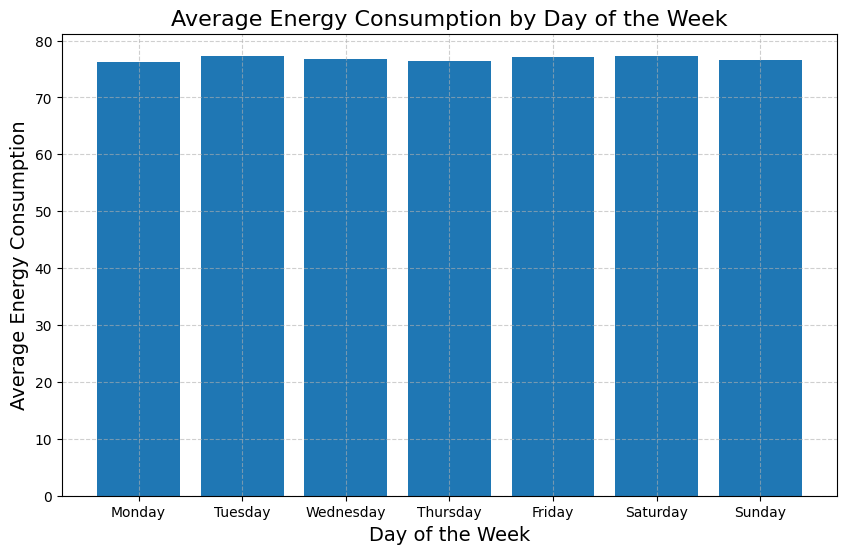

In [18]:
dayofweek_avg_consumption = df.groupby('DayOfWeek')['EnergyConsumption'].mean().reset_index()

# Sort the days of the week to ensure correct order
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_avg_consumption['DayOfWeek'] = pd.Categorical(dayofweek_avg_consumption['DayOfWeek'], categories=dayofweek_order, ordered=True)
dayofweek_avg_consumption = dayofweek_avg_consumption.sort_values('DayOfWeek')

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(dayofweek_avg_consumption['DayOfWeek'], dayofweek_avg_consumption['EnergyConsumption'])
plt.title('Average Energy Consumption by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

In [19]:
df.drop('DayOfWeek', axis=1, inplace=True)

In [20]:
df.head()

,Season,TimeOfDay,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,Winter,Night,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,Winter,Night,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,Winter,Night,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,Winter,Night,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,Winter,Morning,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [21]:
df.shape

(5000, 11)

In [22]:
categorical_features = ['Season', 'TimeOfDay', 'Holiday', 'HVACUsage', 'LightingUsage']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,Season_Monsoon,Season_Summer,Season_Winter,TimeOfDay_Evening,TimeOfDay_Morning,TimeOfDay_Night,Holiday_Yes,HVACUsage_On,LightingUsage_On
0,25.139433,43.431581,1565.693999,5,2.774699,75.364373,False,False,True,False,False,True,False,True,False
1,27.731651,54.225919,1411.064918,1,21.831384,83.401855,False,False,True,False,False,True,False,True,True
2,28.704277,58.907658,1755.715009,2,6.764672,78.270888,False,False,True,False,False,True,False,False,False
3,20.080469,50.371637,1452.316318,1,8.623447,56.519850,False,False,True,False,False,True,False,False,True
4,23.097359,51.401421,1094.130359,9,3.071969,70.811732,False,False,True,False,True,False,False,True,False


In [24]:
df.shape

(5000, 15)

In [25]:
X = df.drop(columns=['EnergyConsumption'])
y = df['EnergyConsumption']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [27]:
X_train.shape

(4000, 14)

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[0.38356624, 0.16583629, 0.78710351, ..., 1.        , 0.        ,
        1.        ],
       [0.03026714, 0.67376719, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.05697615, 0.34603388, 0.39311902, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.87394221, 0.35380599, 0.58082363, ..., 0.        , 1.        ,
        1.        ],
       [0.60222829, 1.        , 0.88663545, ..., 1.        , 1.        ,
        1.        ],
       [0.31837734, 0.96334379, 0.8799872 , ..., 0.        , 1.        ,
        0.        ]])

In [30]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [31]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 14))
model.add(Dropout(0.01))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import Huber
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss=Huber(),
              metrics=['mae'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(X_train_scaled, y_train,
                    validation_data= (X_test_scaled, y_test),
                    epochs = 30,
                    batch_size=32,
                    verbose=1)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 73.8999 - mae: 74.3999 - val_loss: 56.6627 - val_mae: 57.1627
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.9657 - mae: 42.4650 - val_loss: 10.4025 - val_mae: 10.8958
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4031 - mae: 10.8940 - val_loss: 9.3173 - val_mae: 9.8048
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3805 - mae: 9.8690 - val_loss: 8.6645 - val_mae: 9.1528
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8335 - mae: 9.3224 - val_loss: 8.2137 - val_mae: 8.7002
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3005 - mae: 8.7896 - val_loss: 7.7755 - val_mae: 8.2636
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9998 - mae: 8.4868 - val_loss: 7.3304 - val_mae: 7.8145
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4660 - mae: 7.9517 - val_loss: 7.2542 - val_mae: 7.7384
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

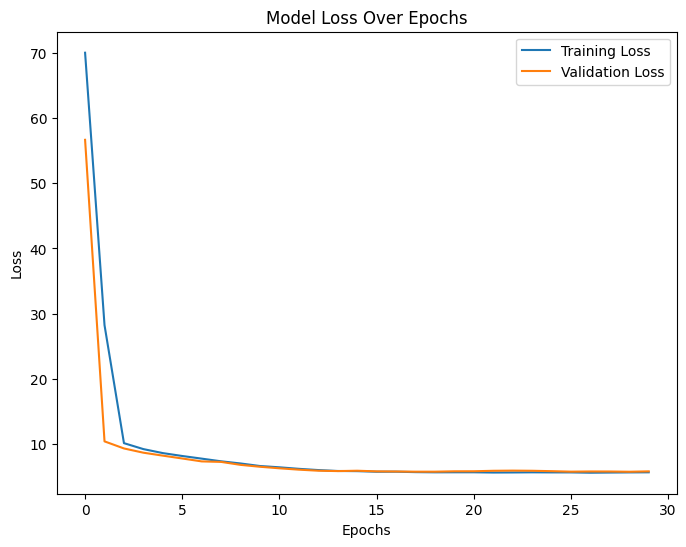

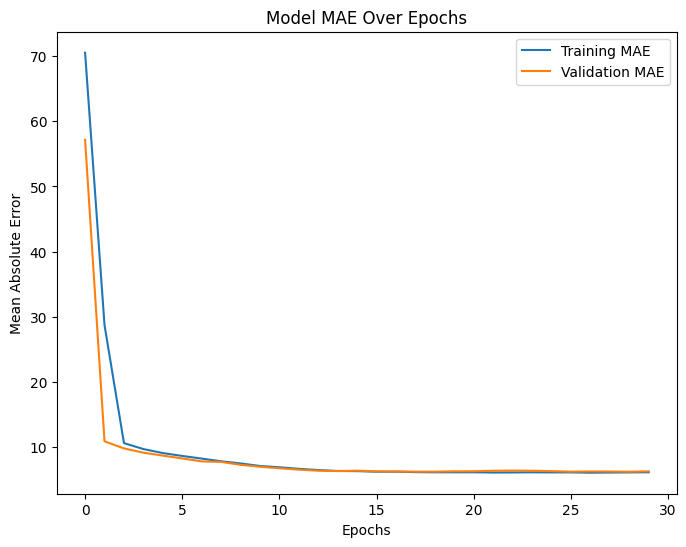

In [35]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(8, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [36]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0166 - mae: 6.5016 
Test Loss: 5.803336143493652
Test MAE: 6.287670612335205


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


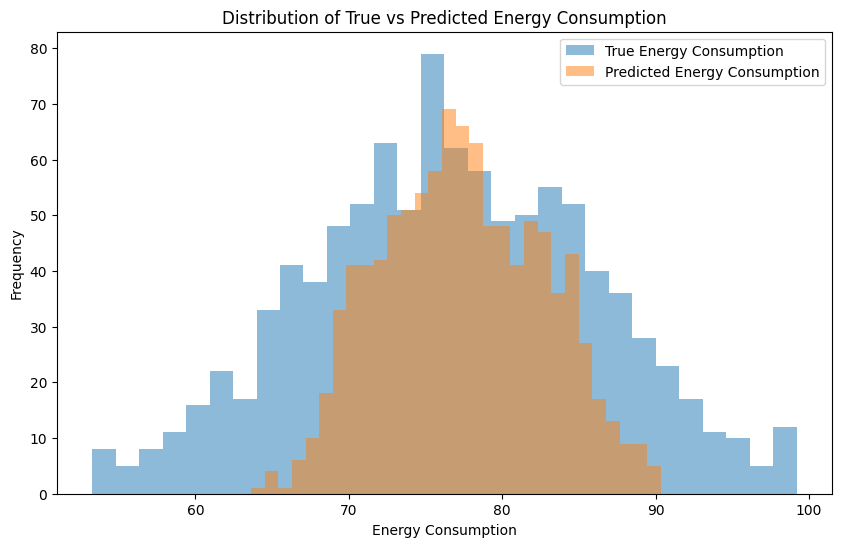

In [37]:
y_pred = model.predict(X_test_scaled)

# Plot histograms of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='True Energy Consumption')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of True vs Predicted Energy Consumption')
plt.legend(loc='upper right')
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Display the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')

Mean Absolute Error (MAE): 6.2876706533977575
Mean Squared Error (MSE): 62.033213266765046
Root Mean Squared Error (RMSE): 7.876116636183408
R² Score: 0.28567484648882424
Explained Variance Score: 0.2931665843189709
